In [196]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import yaml
from sklearn.decomposition import PCA
import pandas as pd

import matplotlib.pyplot as plt


import sklearn
from sklearn.linear_model import LogisticRegression, LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor

In [197]:
train_dataset = loadmat("edlData.mat")['dataset']

In [198]:
test_dataset = loadmat("edlDataTest.mat")['dataset']

In [199]:
dataset.shape

(2434, 1097)

In [200]:
test_dataset.shape

(1140, 1097)

In [201]:
#PRE PROCESSING
t = train_dataset[:, 0]

train_data = pd.DataFrame(data = t,  
                  columns = ['Time'])

t = test_dataset[:, 0]

test_data = pd.DataFrame(data = t,  
                  columns = ['Time'])

In [202]:
dummy_data = train_dataset[:, 1:]
pf_pose = dummy_data[:, 0:4]

lidar_data = dummy_data[:, 4:1085]

odom_data = dummy_data[:, 1085:1091]

imu_data = dummy_data[:, 1091:]

imu_data[:, [1, 0]] = imu_data[:, [0, 1]]

imu_accel_factor = 9.198166819431714

imu_gyro_factor = 1/25714

imu_data[:, :2] *= imu_accel_factor

imu_data[:, 2] *= imu_gyro_factor

In [203]:
x_ground = pf_pose[:,0]
y_ground = pf_pose[:,1]
qw_ground = pf_pose[:,2]
qz_ground = pf_pose[:,3]
angle_ground = 2*np.arctan2(qz_ground, qw_ground)

odom_x = odom_data[:,0]
odom_y = odom_data[:,1]
odom_qw = odom_data[:,2]
odom_qz = odom_data[:,3]
odom_angle = 2*np.arctan2(odom_qz, odom_qw)
odom_vx = odom_data[:, 4]
odom_wz = odom_data[:,5]

imu_ax = imu_data[:,0]
imu_ay = imu_data[:,1]
imu_wz = imu_data[:,2]
imu_qw = imu_data[:,3]
imu_qz = imu_data[:,4]
imu_angle = 2*np.arctan2(imu_qz, imu_qw)

In [204]:
train_data['x_ground'] = x_ground
train_data['y_ground'] = y_ground
train_data['qw_ground'] = qw_ground
train_data['qz_ground'] = qz_ground
train_data['angle_ground'] = angle_ground

train_data['odom_x'] = odom_x
train_data['odom_y'] = odom_y
train_data['odom_qw'] = odom_qw
train_data['odom_qz'] = odom_qz
train_data['odom_angle'] = odom_angle
train_data['odom_vx'] = odom_vx
train_data['odom_wz'] = odom_wz

train_data['imu_ax'] = imu_ax
train_data['imu_ay'] = imu_ay
train_data['imu_wz'] = imu_wz

train_data['imu_qw'] = imu_qw
train_data['imu_qz'] = imu_qz
train_data['imu_angle'] = imu_angle


In [205]:
train_data.to_csv('edl_train_data.csv')
test_data.to_csv('edl_test_data.csv')

In [206]:
dummy_data = test_dataset[:, 1:]
pf_pose = dummy_data[:, 0:4]

lidar_data = dummy_data[:, 4:1085]

odom_data = dummy_data[:, 1085:1091]

imu_data = dummy_data[:, 1091:]

imu_data[:, [1, 0]] = imu_data[:, [0, 1]]

imu_accel_factor = 9.198166819431714

imu_gyro_factor = 1/25714

imu_data[:, :2] *= imu_accel_factor

imu_data[:, 2] *= imu_gyro_factor

In [207]:
x_ground = pf_pose[:,0]
y_ground = pf_pose[:,1]
qw_ground = pf_pose[:,2]
qz_ground = pf_pose[:,3]
angle_ground = 2*np.arctan2(qz_ground, qw_ground)

odom_x = odom_data[:,0]
odom_y = odom_data[:,1]
odom_qw = odom_data[:,2]
odom_qz = odom_data[:,3]
odom_angle = 2*np.arctan2(odom_qz, odom_qw)
odom_vx = odom_data[:, 4]
odom_wz = odom_data[:,5]

imu_ax = imu_data[:,0]
imu_ay = imu_data[:,1]
imu_wz = imu_data[:,2]
imu_qw = imu_data[:,3]
imu_qz = imu_data[:,4]
imu_angle = 2*np.arctan2(imu_qz, imu_qw)

In [208]:
test_data['x_ground'] = x_ground
test_data['y_ground'] = y_ground
test_data['qw_ground'] = qw_ground
test_data['qz_ground'] = qz_ground
test_data['angle_ground'] = angle_ground

test_data['odom_x'] = odom_x
test_data['odom_y'] = odom_y
test_data['odom_qw'] = odom_qw
test_data['odom_qz'] = odom_qz
test_data['odom_angle'] = odom_angle
test_data['odom_vx'] = odom_vx
test_data['odom_wz'] = odom_wz

test_data['imu_ax'] = imu_ax
test_data['imu_ay'] = imu_ay
test_data['imu_wz'] = imu_wz

test_data['imu_qw'] = imu_qw
test_data['imu_qz'] = imu_qz
test_data['imu_angle'] = imu_angle

In [209]:
#Training
x_diff = []
y_diff = []
for i in range(len(train_data)-1):
    x_diff.append(train_data['x_ground'][i+1] - train_data['x_ground'][i])
    y_diff.append(train_data['y_ground'][i+1] - train_data['y_ground'][i])

x_diff.append(0)
y_diff.append(0)
train_data['x_diff'] = x_diff
train_data['y_diff'] = y_diff


# x_diff = np.zeros_like(data['x_ground'])
# y_diff = np.zeros_like(data['y_ground'])

# x_diff[:-1] = np.diff(data['x_ground'])
# y_diff[:-1] = np.diff(data['y_ground'])

# x_diff[-1] = x_diff[-2]
# y_diff[-1] = y_diff[-2]


In [210]:
#Testing
x_diff = []
y_diff = []
for i in range(len(test_data)-1):
    x_diff.append(test_data['x_ground'][i+1] - test_data['x_ground'][i])
    y_diff.append(test_data['y_ground'][i+1] - test_data['y_ground'][i])

x_diff.append(0)
y_diff.append(0)
test_data['x_diff'] = x_diff
test_data['y_diff'] = y_diff

#Create Dataset

##Train Data

In [211]:
train_data_x = train_data[['odom_x', 'odom_angle',	'odom_vx',	'odom_wz',	'imu_ax',	'imu_wz']].copy(deep = True)
train_data_y = train_data[['odom_y', 'odom_angle',	'odom_vx',	'odom_wz',	'imu_ay', 'imu_wz']].copy(deep = True)
train_label_x = train_data[['x_diff']].copy(deep = True)
train_label_y = train_data[['y_diff']].copy(deep = True)

In [212]:
train_data_x['odom_x-1'] = train_data_x['odom_x'].shift(1)
train_data_x['odom_x-2'] = train_data_x['odom_x'].shift(2)
train_data_x['odom_x-3'] = train_data_x['odom_x'].shift(3)
train_data_x['odom_x-4'] = train_data_x['odom_x'].shift(4)
train_data_x['odom_x-5'] = train_data_x['odom_x'].shift(5)

train_data_x['odom_angle-1'] = train_data_x['odom_angle'].shift(1)
train_data_x['odom_angle-2'] = train_data_x['odom_angle'].shift(2)
train_data_x['odom_angle-3'] = train_data_x['odom_angle'].shift(3)
train_data_x['odom_angle-4'] = train_data_x['odom_angle'].shift(4)
train_data_x['odom_angle-5'] = train_data_x['odom_angle'].shift(5)

train_data_x['odom_vx-1'] = train_data_x['odom_vx'].shift(1)
train_data_x['odom_vx-2'] = train_data_x['odom_vx'].shift(2)
train_data_x['odom_vx-3'] = train_data_x['odom_vx'].shift(3)
train_data_x['odom_vx-4'] = train_data_x['odom_vx'].shift(4)
train_data_x['odom_vx-5'] = train_data_x['odom_vx'].shift(5)

train_data_x['odom_wz-1'] = train_data_x['odom_wz'].shift(1)
train_data_x['odom_wz-2'] = train_data_x['odom_wz'].shift(2)
train_data_x['odom_wz-3'] = train_data_x['odom_wz'].shift(3)
train_data_x['odom_wz-4'] = train_data_x['odom_wz'].shift(4)
train_data_x['odom_wz-5'] = train_data_x['odom_wz'].shift(5)

train_data_x['imu_ax-1'] = train_data_x['imu_ax'].shift(1)
train_data_x['imu_ax-2'] = train_data_x['imu_ax'].shift(2)
train_data_x['imu_ax-3'] = train_data_x['imu_ax'].shift(3)
train_data_x['imu_ax-4'] = train_data_x['imu_ax'].shift(4)
train_data_x['imu_ax-5'] = train_data_x['imu_ax'].shift(5)

train_data_x['imu_wz-1'] = train_data_x['imu_wz'].shift(1)
train_data_x['imu_wz-2'] = train_data_x['imu_wz'].shift(2)
train_data_x['imu_wz-3'] = train_data_x['imu_wz'].shift(3)
train_data_x['imu_wz-4'] = train_data_x['imu_wz'].shift(4)
train_data_x['imu_wz-5'] = train_data_x['imu_wz'].shift(5)

In [213]:
train_data_y['odom_y-1'] = train_data_y['odom_y'].shift(1)
train_data_y['odom_y-2'] = train_data_y['odom_y'].shift(2)
train_data_y['odom_y-3'] = train_data_y['odom_y'].shift(3)
train_data_y['odom_y-4'] = train_data_y['odom_y'].shift(4)
train_data_y['odom_y-5'] = train_data_y['odom_y'].shift(5)

train_data_y['odom_angle-1'] = train_data_y['odom_angle'].shift(1)
train_data_y['odom_angle-2'] = train_data_y['odom_angle'].shift(2)
train_data_y['odom_angle-3'] = train_data_y['odom_angle'].shift(3)
train_data_y['odom_angle-4'] = train_data_y['odom_angle'].shift(4)
train_data_y['odom_angle-5'] = train_data_y['odom_angle'].shift(5)

train_data_y['odom_vx-1'] = train_data_y['odom_vx'].shift(1)
train_data_y['odom_vx-2'] = train_data_y['odom_vx'].shift(2)
train_data_y['odom_vx-3'] = train_data_y['odom_vx'].shift(3)
train_data_y['odom_vx-4'] = train_data_y['odom_vx'].shift(4)
train_data_y['odom_vx-5'] = train_data_y['odom_vx'].shift(5)

train_data_y['odom_wz-1'] = train_data_y['odom_wz'].shift(1)
train_data_y['odom_wz-2'] = train_data_y['odom_wz'].shift(2)
train_data_y['odom_wz-3'] = train_data_y['odom_wz'].shift(3)
train_data_y['odom_wz-4'] = train_data_y['odom_wz'].shift(4)
train_data_y['odom_wz-5'] = train_data_y['odom_wz'].shift(5)

train_data_y['imu_ay-1'] = train_data_y['imu_ay'].shift(1)
train_data_y['imu_ay-2'] = train_data_y['imu_ay'].shift(2)
train_data_y['imu_ay-3'] = train_data_y['imu_ay'].shift(3)
train_data_y['imu_ay-4'] = train_data_y['imu_ay'].shift(4)
train_data_y['imu_ay-5'] = train_data_y['imu_ay'].shift(5)

train_data_y['imu_wz-1'] = train_data_y['imu_wz'].shift(1)
train_data_y['imu_wz-2'] = train_data_y['imu_wz'].shift(2)
train_data_y['imu_wz-3'] = train_data_y['imu_wz'].shift(3)
train_data_y['imu_wz-4'] = train_data_y['imu_wz'].shift(4)
train_data_y['imu_wz-4'] = train_data_y['imu_wz'].shift(5)

In [214]:
train_data_x = train_data_x[5:-1]
train_data_y = train_data_y[5:-1]

train_label_x = train_label_x[5:-1]
train_label_y = train_label_y[5:-1]

x_ground_train = train_data['x_ground'][5:-1]
y_ground_train = train_data['y_ground'][5:-1]

In [215]:
#RESET INDEX
train_data_x = train_data_x.reset_index()
train_data_x = train_data_x.drop(columns=['index'])

train_data_y = train_data_y.reset_index()
train_data_y = train_data_y.drop(columns=['index'])

train_label_x = train_label_x.reset_index()
train_label_x = train_label_x.drop(columns=['index'])

train_label_y = train_label_y.reset_index()
train_label_y = train_label_y.drop(columns=['index'])

x_ground_train = x_ground_train.reset_index()
x_ground_train = x_ground_train.drop(columns=['index'])

y_ground_train = y_ground_train.reset_index()
y_ground_train = y_ground_train.drop(columns=['index'])

In [216]:
len(train_data_x)

2428

#TEST

In [217]:
test_data_x = test_data[['odom_x', 'odom_angle',	'odom_vx',	'odom_wz',	'imu_ax',	'imu_wz']].copy(deep = True)
test_data_y = test_data[['odom_y', 'odom_angle',	'odom_vx',	'odom_wz',	'imu_ay', 'imu_wz']].copy(deep = True)
test_label_x = test_data[['x_diff']].copy(deep = True)
test_label_y = test_data[['y_diff']].copy(deep = True)

In [218]:
test_data_x['odom_x-1'] = test_data_x['odom_x'].shift(1)
test_data_x['odom_x-2'] = test_data_x['odom_x'].shift(2)
test_data_x['odom_x-3'] = test_data_x['odom_x'].shift(3)
test_data_x['odom_x-4'] = test_data_x['odom_x'].shift(4)
test_data_x['odom_x-5'] = test_data_x['odom_x'].shift(5)

test_data_x['odom_angle-1'] = test_data_x['odom_angle'].shift(1)
test_data_x['odom_angle-2'] = test_data_x['odom_angle'].shift(2)
test_data_x['odom_angle-3'] = test_data_x['odom_angle'].shift(3)
test_data_x['odom_angle-4'] = test_data_x['odom_angle'].shift(4)
test_data_x['odom_angle-5'] = test_data_x['odom_angle'].shift(5)

test_data_x['odom_vx-1'] = test_data_x['odom_vx'].shift(1)
test_data_x['odom_vx-2'] = test_data_x['odom_vx'].shift(2)
test_data_x['odom_vx-3'] = test_data_x['odom_vx'].shift(3)
test_data_x['odom_vx-4'] = test_data_x['odom_vx'].shift(4)
test_data_x['odom_vx-5'] = test_data_x['odom_vx'].shift(5)

test_data_x['odom_wz-1'] = test_data_x['odom_wz'].shift(1)
test_data_x['odom_wz-2'] = test_data_x['odom_wz'].shift(2)
test_data_x['odom_wz-3'] = test_data_x['odom_wz'].shift(3)
test_data_x['odom_wz-4'] = test_data_x['odom_wz'].shift(4)
test_data_x['odom_wz-5'] = test_data_x['odom_wz'].shift(5)

test_data_x['imu_ax-1'] = test_data_x['imu_ax'].shift(1)
test_data_x['imu_ax-2'] = test_data_x['imu_ax'].shift(2)
test_data_x['imu_ax-3'] = test_data_x['imu_ax'].shift(3)
test_data_x['imu_ax-4'] = test_data_x['imu_ax'].shift(4)
test_data_x['imu_ax-5'] = test_data_x['imu_ax'].shift(5)

test_data_x['imu_wz-1'] = test_data_x['imu_wz'].shift(1)
test_data_x['imu_wz-2'] = test_data_x['imu_wz'].shift(2)
test_data_x['imu_wz-3'] = test_data_x['imu_wz'].shift(3)
test_data_x['imu_wz-4'] = test_data_x['imu_wz'].shift(4)
test_data_x['imu_wz-5'] = test_data_x['imu_wz'].shift(5)


In [219]:
test_data_y['odom_y-1'] = test_data_y['odom_y'].shift(1)
test_data_y['odom_y-2'] = test_data_y['odom_y'].shift(2)
test_data_y['odom_y-3'] = test_data_y['odom_y'].shift(3)
test_data_y['odom_y-4'] = test_data_y['odom_y'].shift(4)
test_data_y['odom_y-5'] = test_data_y['odom_y'].shift(5)

test_data_y['odom_angle-1'] = test_data_y['odom_angle'].shift(1)
test_data_y['odom_angle-2'] = test_data_y['odom_angle'].shift(2)
test_data_y['odom_angle-3'] = test_data_y['odom_angle'].shift(3)
test_data_y['odom_angle-4'] = test_data_y['odom_angle'].shift(4)
test_data_y['odom_angle-5'] = test_data_y['odom_angle'].shift(5)

test_data_y['odom_vx-1'] = test_data_y['odom_vx'].shift(1)
test_data_y['odom_vx-2'] = test_data_y['odom_vx'].shift(2)
test_data_y['odom_vx-3'] = test_data_y['odom_vx'].shift(3)
test_data_y['odom_vx-4'] = test_data_y['odom_vx'].shift(4)
test_data_y['odom_vx-5'] = test_data_y['odom_vx'].shift(5)

test_data_y['odom_wz-1'] = test_data_y['odom_wz'].shift(1)
test_data_y['odom_wz-2'] = test_data_y['odom_wz'].shift(2)
test_data_y['odom_wz-3'] = test_data_y['odom_wz'].shift(3)
test_data_y['odom_wz-4'] = test_data_y['odom_wz'].shift(4)
test_data_y['odom_wz-5'] = test_data_y['odom_wz'].shift(5)

test_data_y['imu_ay-1'] = test_data_y['imu_ay'].shift(1)
test_data_y['imu_ay-2'] = test_data_y['imu_ay'].shift(2)
test_data_y['imu_ay-3'] = test_data_y['imu_ay'].shift(3)
test_data_y['imu_ay-4'] = test_data_y['imu_ay'].shift(4)
test_data_y['imu_ay-5'] = test_data_y['imu_ay'].shift(5)

test_data_y['imu_wz-1'] = test_data_y['imu_wz'].shift(1)
test_data_y['imu_wz-2'] = test_data_y['imu_wz'].shift(2)
test_data_y['imu_wz-3'] = test_data_y['imu_wz'].shift(3)
test_data_y['imu_wz-4'] = test_data_y['imu_wz'].shift(4)
test_data_y['imu_wz-4'] = test_data_y['imu_wz'].shift(5)


In [220]:
test_data_x = test_data_x[5:-1]
test_data_y = test_data_y[5:-1]

test_label_x = test_label_x[5:-1]
test_label_y = test_label_y[5:-1]

x_ground_test = test_data['x_ground'][5:-1]
y_ground_test = test_data['y_ground'][5:-1]


In [221]:
#RESET INDEX
test_data_x = test_data_x.reset_index()
test_data_x = test_data_x.drop(columns=['index'])

test_data_y = test_data_y.reset_index()
test_data_y = test_data_y.drop(columns=['index'])

test_label_x = test_label_x.reset_index()
test_label_x = test_label_x.drop(columns=['index'])

test_label_y = test_label_y.reset_index()
test_label_y = test_label_y.drop(columns=['index'])

x_ground_test = x_ground_test.reset_index()
x_ground_test = x_ground_test.drop(columns=['index'])

y_ground_test = y_ground_test.reset_index()
y_ground_test = y_ground_test.drop(columns=['index'])


In [222]:
len(test_data_x)

1134

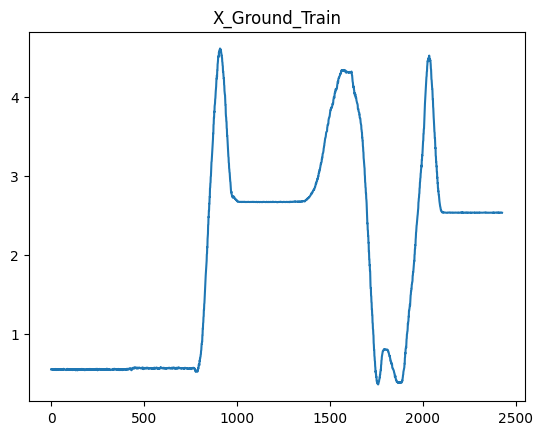

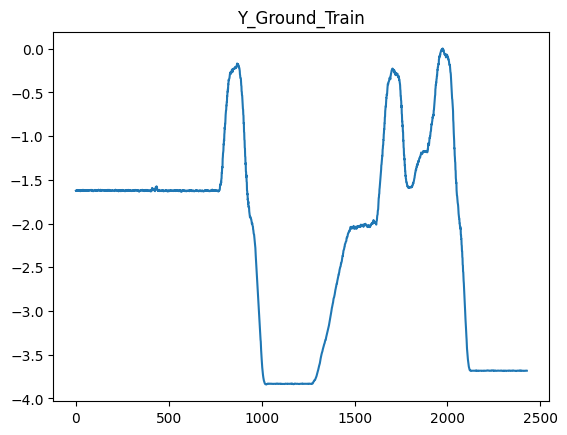

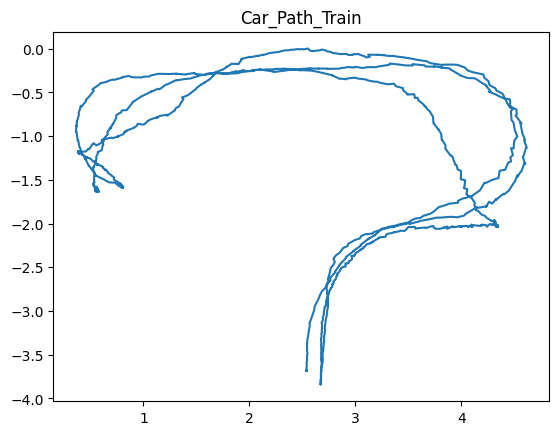

In [223]:
plt.plot(x_ground_train)
plt.title('X_Ground_Train')
plt.show()
plt.plot(y_ground_train)
plt.title('Y_Ground_Train')
plt.show()
plt.plot(x_ground_train, y_ground_train)
plt.title('Car_Path_Train')
plt.show()

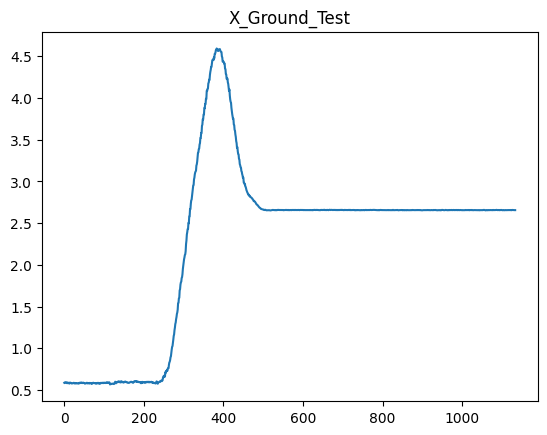

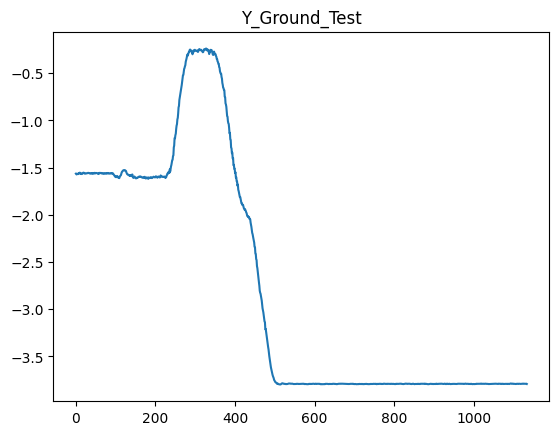

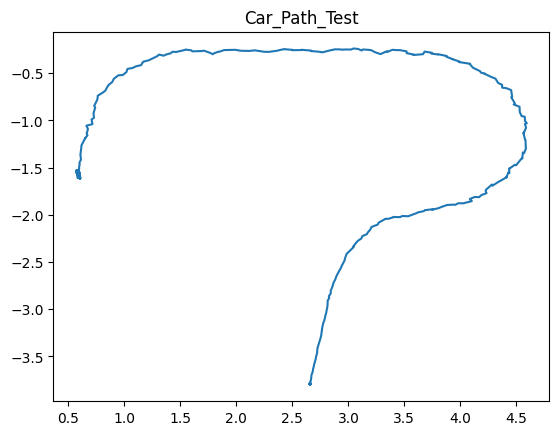

In [224]:
plt.plot(x_ground_test)
plt.title('X_Ground_Test')
plt.show()
plt.plot(y_ground_test)
plt.title('Y_Ground_Test')
plt.show()
plt.plot(x_ground_test, y_ground_test)
plt.title('Car_Path_Test')
plt.show()

In [225]:
y_true = np.array([x_ground_test, y_ground_test]).squeeze().T
y_true.shape

(1134, 2)

In [226]:
var_y_true = np.var(y_true)
var_y_true


7.703848272543475

In [227]:
def NMSE(y_true, y_pred):
    nmse = np.square(np.subtract(y_true, y_pred)).mean()/np.var(y_true)
    return nmse

#Linear Regression

In [228]:
clf_lr_x= LinearRegression()
clf_lr_y= LinearRegression()

In [229]:
clf_lr_x.fit(train_data_x, train_label_x)
clf_lr_y.fit(train_data_y, train_label_y)

LinearRegression()

In [230]:
pred_x_train = clf_lr_x.predict(train_data_x)
pred_y_train = clf_lr_y.predict(train_data_y)

In [231]:
pred_x_test = clf_lr_x.predict(test_data_x)
pred_y_test = clf_lr_y.predict(test_data_y)

In [232]:
print('MSE_lr_x_train: ',mean_squared_error(train_label_x, pred_x_train))
print('MSE_lr_y_train: ',mean_squared_error(train_label_y, pred_y_train))

MSE_lr_x_train:  0.00029292589619923703
MSE_lr_y_train:  0.00022721255860600528


In [233]:
print('MSE_lr_x_test: ',mean_squared_error(test_label_x, pred_x_test))
print('MSE_lr_y_test: ',mean_squared_error(test_label_y, pred_y_test))

MSE_lr_x_test:  0.0002550465673162849
MSE_lr_y_test:  0.00015523956717719269


In [234]:
# plt.plot(pred_x_train)
# plt.plot(train_label_x)
# plt.show()
# plt.plot(pred_y_train)
# plt.plot(train_label_y)
# plt.show()
# plt.plot(pred_x_test)
# plt.plot(test_label_x)
# plt.show()
# plt.plot(pred_y_test)
# plt.plot(test_label_y)
# plt.show()

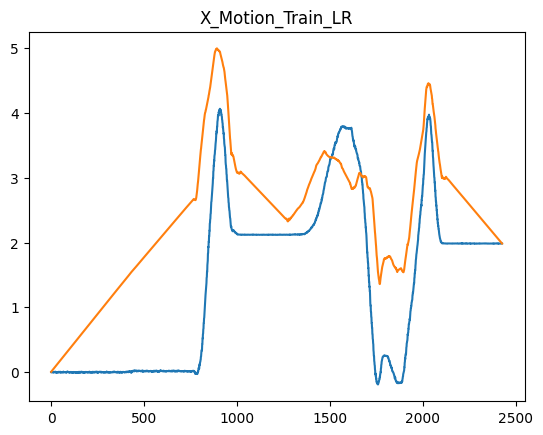

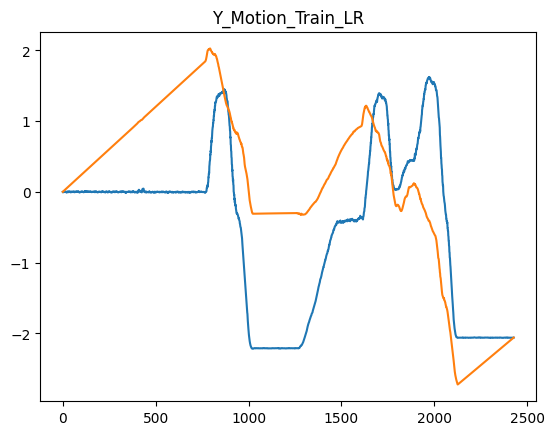

Text(0.5, 1.0, 'Car_Path_Train_LR')

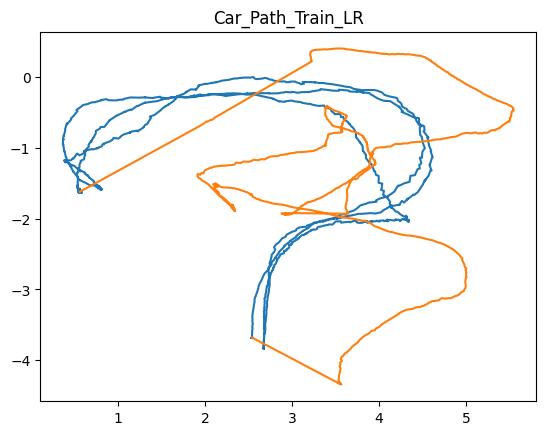

In [235]:

plt.plot(np.cumsum(train_label_x))
plt.plot(np.cumsum(pred_x_train))
plt.title('X_Motion_Train_LR')
plt.show()

plt.plot(np.cumsum(train_label_y))
plt.plot(np.cumsum(pred_y_train))
plt.title('Y_Motion_Train_LR')
plt.show()

pred_x_train[0] = pred_x_train[0] + x_ground_train['x_ground'][0]
pred_y_train[0] = pred_y_train[0] + y_ground_train['y_ground'][0]

plt.plot(train_data['x_ground'], train_data['y_ground'])
plt.plot(np.cumsum(pred_x_train), np.cumsum(pred_y_train))
plt.title('Car_Path_Train_LR')



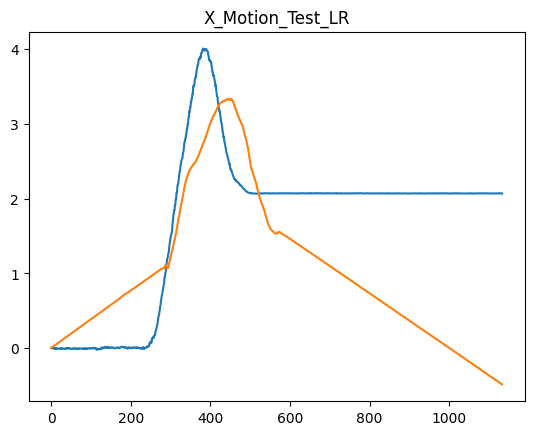

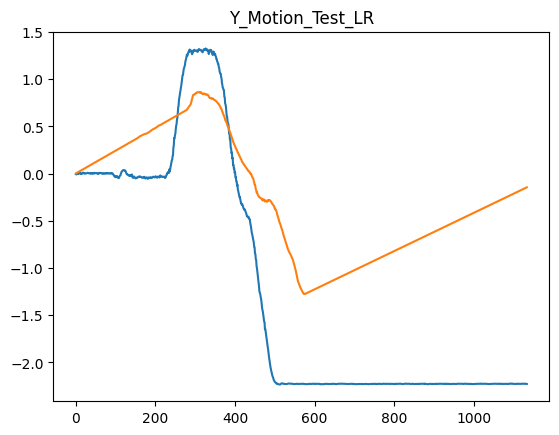

Text(0.5, 1.0, 'Car_Path_Test_LR')

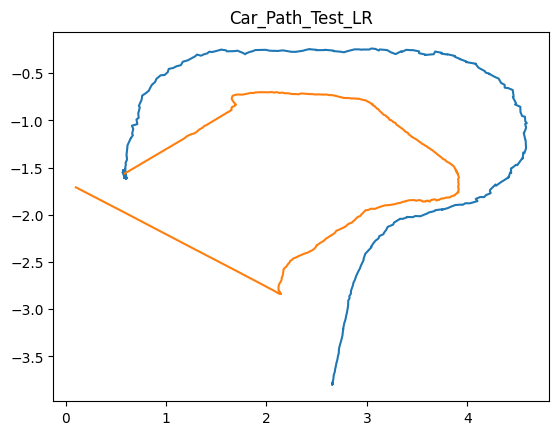

In [236]:
plt.plot(np.cumsum(test_label_x))
plt.plot(np.cumsum(pred_x_test))
plt.title('X_Motion_Test_LR')
plt.show()

plt.plot(np.cumsum(test_label_y))
plt.plot(np.cumsum(pred_y_test))
plt.title('Y_Motion_Test_LR')
plt.show()

pred_x_test[0] = pred_x_test[0] + x_ground_test['x_ground'][0]
pred_y_test[0] = pred_y_test[0] + y_ground_test['y_ground'][0]

plt.plot(test_data['x_ground'], test_data['y_ground'])
plt.plot(np.cumsum(pred_x_test), np.cumsum(pred_y_test))
# plt.plot(x_ground_test, y_ground_test)
plt.title('Car_Path_Test_LR')



In [237]:
y_pred = np.array([np.cumsum(pred_x_test), np.cumsum(pred_y_test)]).T
y_pred.shape

(1134, 2)

In [238]:
print('NMSE: ', NMSE(y_true,y_pred))

NMSE:  0.19397282882863026


#RF Regressor

In [239]:
clf_rf_x = RandomForestRegressor(n_estimators = 200)
clf_rf_y = RandomForestRegressor(n_estimators = 200)

In [240]:
clf_rf_x.fit(train_data_x, train_label_x)
clf_rf_y.fit(train_data_y, train_label_y)

<ipython-input-240-cdf18101dcfe>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf_x.fit(train_data_x, train_label_x)
<ipython-input-240-cdf18101dcfe>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rf_y.fit(train_data_y, train_label_y)


RandomForestRegressor(n_estimators=200)

In [241]:
pred_x_train = clf_rf_x.predict(train_data_x)
pred_y_train = clf_rf_y.predict(train_data_y)

In [242]:
pred_x_test = clf_rf_x.predict(test_data_x)
pred_y_test = clf_rf_y.predict(test_data_y)

In [243]:
print('MSE_rf_x_train: ',mean_squared_error(train_label_x, pred_x_train))
print('MSE_rf_y_train: ',mean_squared_error(train_label_y, pred_y_train))

MSE_rf_x_train:  3.841436837964104e-05
MSE_rf_y_train:  2.5423548429611166e-05


In [244]:
print('MSE_rf_x_test: ',mean_squared_error(test_label_x, pred_x_test))
print('MSE_rf_y_test: ',mean_squared_error(test_label_y, pred_y_test))

MSE_rf_x_test:  0.00038802615310951414
MSE_rf_y_test:  0.0002859804622593151


In [245]:
# plt.plot(pred_x_train)
# plt.plot(train_label_x)
# plt.show()
# plt.plot(pred_y_train)
# plt.plot(train_label_y)
# plt.show()
# plt.plot(pred_x_test)
# plt.plot(test_label_x)
# plt.show()
# plt.plot(pred_y_test)
# plt.plot(test_label_y)
# plt.show()

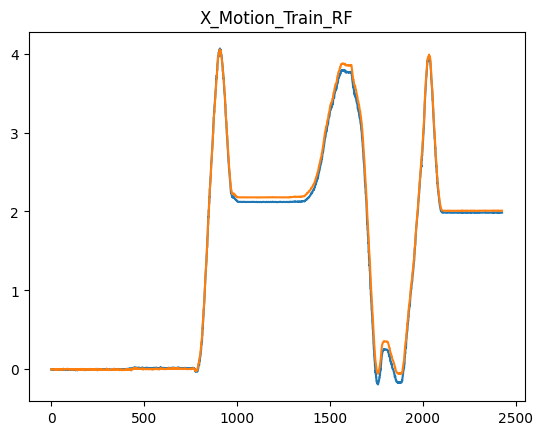

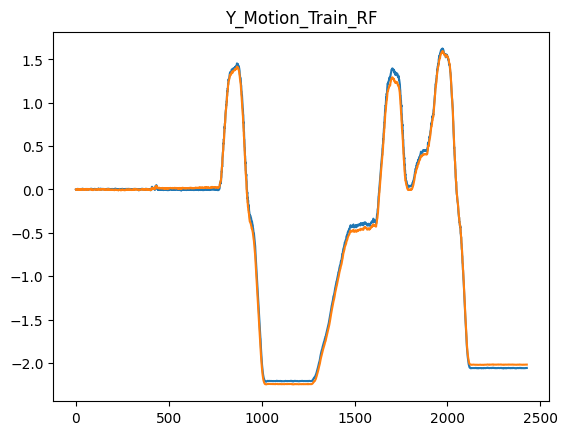

Text(0.5, 1.0, 'Car_Path_Train_RF')

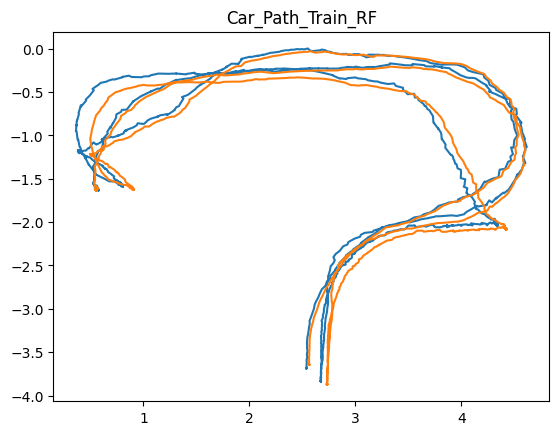

In [246]:

plt.plot(np.cumsum(train_label_x))
plt.plot(np.cumsum(pred_x_train))
plt.title('X_Motion_Train_RF')
plt.show()

plt.plot(np.cumsum(train_label_y))
plt.plot(np.cumsum(pred_y_train))
plt.title('Y_Motion_Train_RF')
plt.show()

pred_x_train[0] = pred_x_train[0] + x_ground_train['x_ground'][0]
pred_y_train[0] = pred_y_train[0] + y_ground_train['y_ground'][0]

plt.plot(train_data['x_ground'], train_data['y_ground'])
plt.plot(np.cumsum(pred_x_train), np.cumsum(pred_y_train))
plt.title('Car_Path_Train_RF')



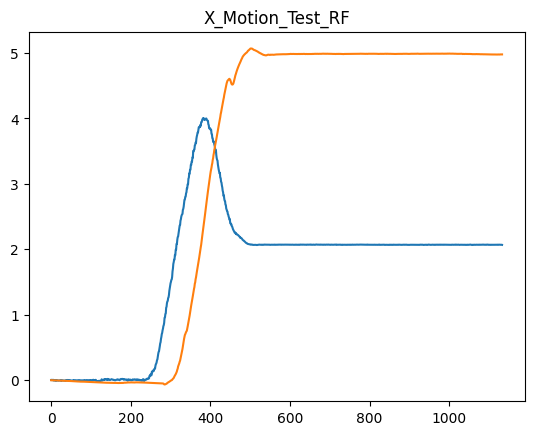

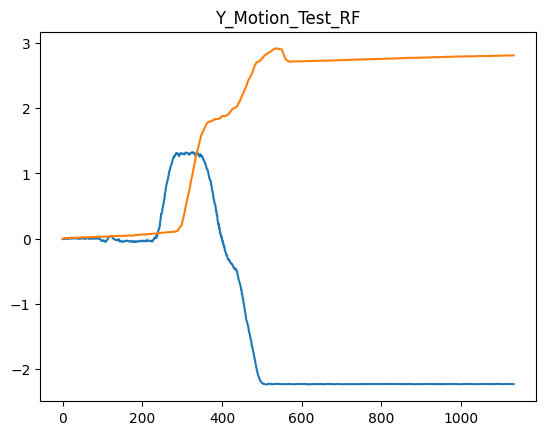

Text(0.5, 1.0, 'Car_Path_Test_RF')

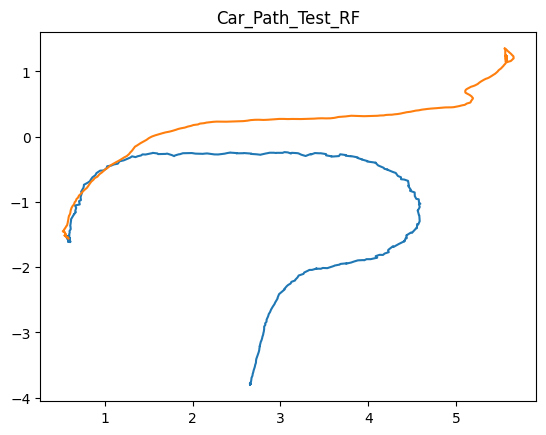

In [247]:
plt.plot(np.cumsum(test_label_x))
plt.plot(np.cumsum(pred_x_test))
plt.title('X_Motion_Test_RF')
plt.show()

plt.plot(np.cumsum(test_label_y))
plt.plot(np.cumsum(pred_y_test))
plt.title('Y_Motion_Test_RF')
plt.show()

pred_x_test[0] = pred_x_test[0] + x_ground_test['x_ground'][0]
pred_y_test[0] = pred_y_test[0] + y_ground_test['y_ground'][0]

plt.plot(test_data['x_ground'], test_data['y_ground'])
plt.plot(np.cumsum(pred_x_test), np.cumsum(pred_y_test))
plt.title('Car_Path_Test_RF')



In [248]:
y_pred = np.array([np.cumsum(pred_x_test), np.cumsum(pred_y_test)]).T
y_pred.shape

(1134, 2)

In [249]:
print('NMSE: ', NMSE(y_true,y_pred))

NMSE:  1.333482159365509


#KNN Regressor

In [250]:
clf_knn_x = KNeighborsRegressor()
clf_knn_y = KNeighborsRegressor()

In [251]:
clf_knn_x.fit(train_data_x, train_label_x)
clf_knn_y.fit(train_data_y, train_label_y)

KNeighborsRegressor()

In [252]:
pred_x_train = clf_knn_x.predict(train_data_x)
pred_y_train = clf_knn_y.predict(train_data_y)

In [253]:
pred_x_test = clf_knn_x.predict(test_data_x)
pred_y_test = clf_knn_y.predict(test_data_y)

In [254]:
print('MSE_knn_x_train: ',mean_squared_error(train_label_x, pred_x_train))
print('MSE_knn_y_train: ',mean_squared_error(train_label_y, pred_y_train))

MSE_knn_x_train:  0.0001772346593504152
MSE_knn_y_train:  0.0001159370621106095


In [255]:
print('MSE_knn_x_test: ',mean_squared_error(test_label_x, pred_x_test))
print('MSE_knn_y_test: ',mean_squared_error(test_label_y, pred_y_test))

MSE_knn_x_test:  0.0004590374611855575
MSE_knn_y_test:  0.0002580181372665367


In [256]:
# plt.plot(pred_x_train)
# plt.plot(train_label_x)
# plt.show()
# plt.plot(pred_y_train)
# plt.plot(train_label_y)
# plt.show()
# plt.plot(pred_x_test)
# plt.plot(test_label_x)
# plt.show()
# plt.plot(pred_y_test)
# plt.plot(test_label_y)
# plt.show()

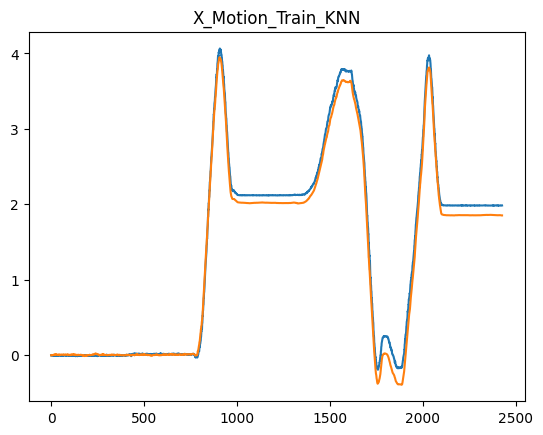

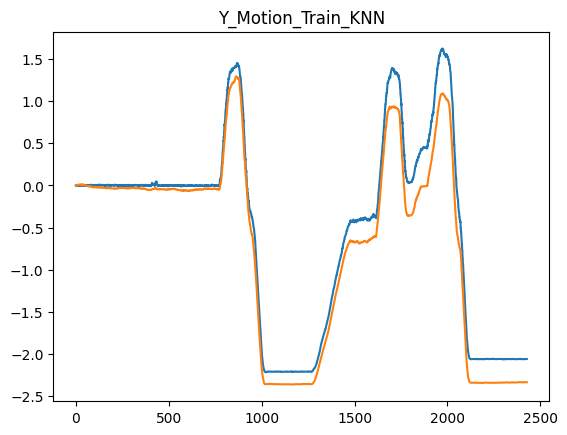

Text(0.5, 1.0, 'Car_Path_Train_KNN')

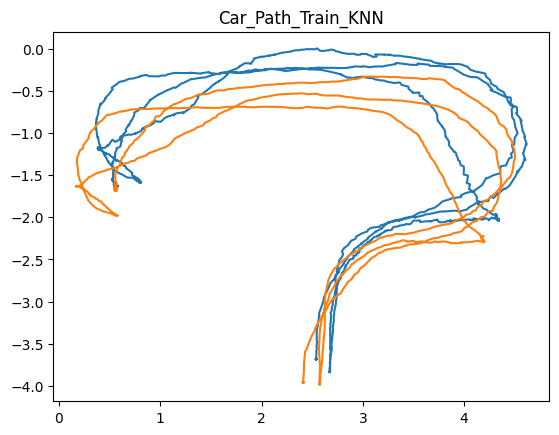

In [257]:

plt.plot(np.cumsum(train_label_x))
plt.plot(np.cumsum(pred_x_train))
plt.title('X_Motion_Train_KNN')
plt.show()

plt.plot(np.cumsum(train_label_y))
plt.plot(np.cumsum(pred_y_train))
plt.title('Y_Motion_Train_KNN')
plt.show()

pred_x_train[0] = pred_x_train[0] + x_ground_train['x_ground'][0]
pred_y_train[0] = pred_y_train[0] + y_ground_train['y_ground'][0]

plt.plot(train_data['x_ground'], train_data['y_ground'])
plt.plot(np.cumsum(pred_x_train), np.cumsum(pred_y_train))
plt.title('Car_Path_Train_KNN')



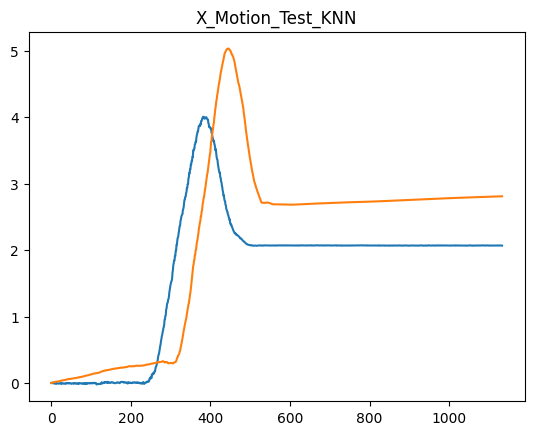

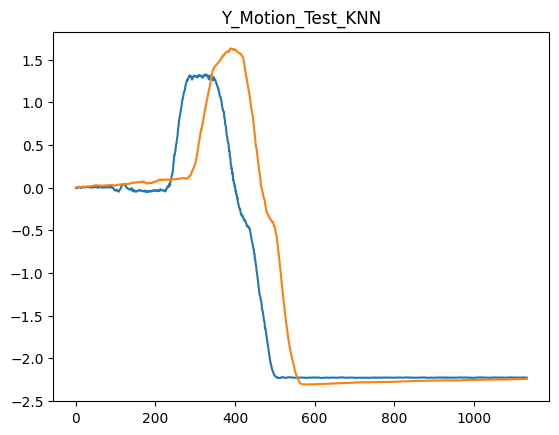

Text(0.5, 1.0, 'Car_Path_Test_KNN')

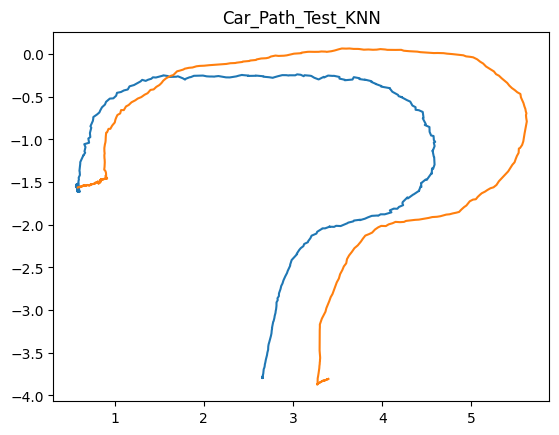

In [258]:
plt.plot(np.cumsum(test_label_x))
plt.plot(np.cumsum(pred_x_test))
plt.title('X_Motion_Test_KNN')
plt.show()

plt.plot(np.cumsum(test_label_y))
plt.plot(np.cumsum(pred_y_test))
plt.title('Y_Motion_Test_KNN')
plt.show()

pred_x_test[0] = pred_x_test[0] + x_ground_test['x_ground'][0]
pred_y_test[0] = pred_y_test[0] + y_ground_test['y_ground'][0]

plt.plot(test_data['x_ground'], test_data['y_ground'])
plt.plot(np.cumsum(pred_x_test), np.cumsum(pred_y_test))
plt.title('Car_Path_Test_KNN')



In [259]:
y_pred = np.array([np.cumsum(pred_x_test), np.cumsum(pred_y_test)]).T
y_pred.shape

(1134, 2)

In [260]:
print('NMSE: ', NMSE(y_true,y_pred))

NMSE:  0.07648528670677046
